# Shortest Path in a Stochatic Network
*by Thibaut Rousseaux and Gabriel Razafindratsima*

## Problematic ##

&nbsp;&nbsp;&nbsp;In a network with fixed topology the throughput of arcs (hops) can change at each step. 

The task will be to **optimize the stochatic rules of routing the message**

## Approach ##

  &nbsp;&nbsp;&nbsp; In this first approach we will create a network with a fixed probability in each arcs (that the message will take the arcs). So the sum of the probability equal 1.

In [1]:
import numpy as np
import random
import sys
import networkx as nx
from networkx.drawing.nx_agraph import write_dot
from networkx.drawing.nx_agraph import to_agraph 
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import graphviz




### Init the Network

In [2]:
numberStates = 4 #Total number of states
stable = 2
unstable = 6

#States
states = ["1","2","3","4"]


#Sequence of events
events = [["11","12","13"],["22","23","24"],["33","34"]]

# Transition matrix
transitionMatrix = [[[0.1,20],[0.6,5],[0.6,3]],[[0.6,20],[0.6,5],[0.6,1]],[[0.6,30],[0.6,4],[0.6,2]],[[0.6,40],[0.6,6]]]
#if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
#  sys.exit("Transition matrix doesn't have the awaited total")



### creating a NetworkX graph

In [3]:

#Graph
G = nx.MultiDiGraph()


# initializing with same weight for every arcs
for e in transitionMatrix:
  for i in range(0,len(e)):
    e[i][0]= 1/len(e)

#Filling edges for the graph
for i in range(0,len(events)):
  for e in range(0,len(events[i])):
    G.add_edges_from([tuple(list(events[i][e]))],weight=transitionMatrix[i][e][1],label=transitionMatrix[i][e])



#print(G.get_edge_data("1","2")[0]['weight'])

### Print the graph

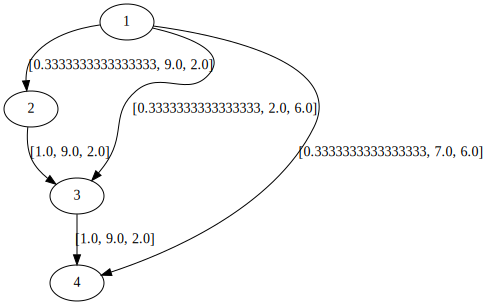

In [15]:
pos=nx.spring_layout(G)
write_dot(mygraph,'graph.dot')

with open("graph.dot") as f:
    dot_graph = f.read()

# remove the display(...)

graphviz.Source(dot_graph)

### Function

    generateNetworks(numberOfNetworks)
is used to generate all the networks for tests

    addToTab()  
is used to store all the data of the path

    activity()
is used to determine where the message will be sent

In [9]:
def setNetwork(network):
    localGraph = nx.MultiDiGraph()
    LocaltransitionMatrix = network[1]
    Localevents = network[0]
    for i in range(0,len(Localevents)):
        for e in range(0,len(Localevents[i])):
            listValue = list(LocaltransitionMatrix[i][e].split(","))
            listValue = list(map(float, listValue))            
            localGraph.add_edges_from([tuple(list(Localevents[i][e]))],weight=listValue[1],label=listValue)
    
    return localGraph

def changeWeight(network,networkList):
  LocaltransitionMatrix = networkList[1]
  Localevents = networkList[0]
  for i in range(0,len(Localevents)):
    for e in range(0,len(Localevents[i])):
      listValue = list(LocaltransitionMatrix[i][e].split(","))
      listValue = list(map(float, listValue))
      for u,v,d in network.edges(data=True):
        newWeight = random.choice([listValue[1]-listValue[2],listValue[1]+listValue[2],listValue[1]])
        if newWeight <= 0.0:
          newWeight = 1.0
        d['weight'] = newWeight
  return network


def addToTab(activityList):
  tabStates = []
  if not any(d.get('Path') == str(activityList) for d in tabStates):
    tabStates.append({
      "Path" : str(activityList),
      "count":1,
      "stepCount": len(activityList)-1
    })
  else:
    for d in tabStates:
      if(d.get('Path') == str(activityList)):
        d['count'] = d['count'] + 1

def generateNetworks(numberOfNetworks):
  tabNetworks = []
  for i in range(0,numberOfNetworks):
    events = [[[]]]
    for x in range(numberStates-1):
        newState = []
        values = []
        count = 0
        event = x+1
        prob=60
        #count != 2 and
        while event <= numberStates: # 2 to change by 4, the 2 in the for is to be switched to 8 (9 states)
            if random.randrange(100) < prob or event==x+2:
                transition = str(x+1)+str(event)
                newState.append(transition)
                count += 1
            event += 1
            prob -= 5
        nbTransitions = len(newState)
        #We can't use the last while as we need to know the total number of transition to get the same availability on each
        for p in range(0,nbTransitions):
            availability = 1/nbTransitions
            weight = random.randrange(1,9)
            #weight can't = 0
            if p == 0:
              power = str(availability)+",9"+","+str(stable)
            elif random.randrange(1,10) > 7:
              power = str(availability)+","+str(weight)+","+str(unstable)
            else:
              power = str(availability)+","+str(weight)+","+str(stable)
            values.append(power)
        if events == [[[]]]:
            events = [[newState],[values]]
        else:
            events[0].append(newState)
            events[1].append(values)
    tabNetworks.append(events)
  return tabNetworks
    #print(events)
#The output "events" gives for each iteration (100) the possible paths of a network


def activity(network,i): # add a parameter iteration to access choose i times (uncomment i and while)
    # i = 0
    # while i != iteration:
      print("RAW NETWORK" + str(network.edges.data()))
      firstState ="1"
      activityList = [firstState]
      # i += 1 
      while int(firstState) != numberStates:
        desiredState = 0
        choice = 1000.0 # huge number to access the first if below, changed afterwards
        #Search for every possibility
        for e in list(network.neighbors(firstState)):
          weight = network.get_edge_data(firstState,e)[0]['weight']
          if choice > weight:
            choice = weight
            desiredState = e
          
        firstState = desiredState
        activityList.append(desiredState)
        network = changeWeight(network,i)
        print(network.edges.data())
      print(activityList)




### Launching the simulation

In [14]:
count =0
#for i in generateNetworks(1):
#  count+= 1
#  mygraph = setNetwork(i)
#  activity(mygraph,i)
 # print(count)
#tabStates = generateNetworks(100)
mygraph = setNetwork(tabStates[5])
# parameter to know the number of iterations (1 in order to make it work properly with 1 iteration )
#activity(1000)


#### Sorting the tab and creating a dataFrame ####
#tabStates = sorted(tabStates, key = lambda i: i['count'],reverse=True)

#dfStates = pd.DataFrame(tabStates)

#print(dfStates)

the set of labels:

$l_i^n$

D = {l1,...,lN-1},li = {l^1,...,$l_i^[n_i]$}

- value from the range [1..9] 


The labels can change during simulation :

- change : possible value of change 2 or 6 (2 for stable link and 6 for unstable link)
    
The path is set following the strategy:

- scenario : between 0 and 1 value initialize to 1/(number of arcs) and used for testing

The scenario changes depending on the chosen path, increasing if an arc is taken and decreasing if an arc is not.

Every label in the network change at each state reached


Network construction : 

- Each arc is set to have a 70% chance to be stable / 30% chance to be unstable
- There is a total of 9 states for each network. 
- Each state's possible arc is it's own, and / or a further step (no cycles allowed)
- A state will have more chances to have an arc with a close state, and the farest the destination state is, the less likely he will have an arc with it (p(1->1)=0.6, p(1->2)=0.55, p(1->3)=0.5 ...p(state+1)=p(state)-0.05 
- A state should atleast have one arc other than his own, without this condition respected, this state will have an arc with State+1
- We set a maximum arc for one state to 4
